Question 1 from Computer Section of 6.3.

Solve and approximate (h=0.1; h=0.01) the provided system of first order differential equations based on given initial conditions. Plot both and find the global truncation error at t=1.

1. Solve the ODEs based on the IVPS
2. Euler the ODes based on the IVPS
3. Plot both
4. Find global truncation error at t=1

- generate points on the interval [0,1]
-- lots of points for plotting the solutions
-- two sets of points based on the step size of Eulers (h0 = 0.1; h1 = 0.01)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, Eq
import pandas as pd

In [ ]:
sol_pts = np.linspace(0,1, 1000)
h0 = np.linspace(0,1, 10)
h1 = np.linspace(0,1,100)
print(h0)
print(h1)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.797

1. Solve ODEs based on the IVPs


In [ ]:
# 6.3.Q1.A

t = symbols('t')
y1, y2 = symbols('y1 y2', cls=Function)

# Define the system of first-order ODEs
ode1 = Eq(y1(t).diff(t), y1(t) + y2(t))
ode2 = Eq(y2(t).diff(t), -y1(t) +y2(t))

# Define initial conditions
initial_conditions = {y1(0): 1, y2(0): 0}

# Find particular solutions using initial conditions
particular_solution = dsolve([ode1, ode2], ics=initial_conditions)

print("Particular solution for y1(t):", particular_solution[0].rhs)
print("Particular solution for y2(t):", particular_solution[1].rhs)

Particular solution for y1(t): exp(t)*cos(t)
Particular solution for y2(t): -exp(t)*sin(t)


In [ ]:
#IVP
w0, d0 = 1,0

#Eulers with step = 0.1
appr_ode1 = [1]
appr_ode2 = [0]

for i in range(len(h0)-1):
  diff_1 = w0+0.11111111*(w0+d0)
  appr_ode1.append(diff_1)

  diff_2 = d0+0.11111111*(-w0+d0)
  appr_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr_ode1))
print(len(appr_ode2))

#Eulers with step=0.01
appr1_ode1 = [1]
appr2_ode2 = [0]

for i in range(len(h1)-1):
  diff1_1 = w0+0.01010101*(w0+d0)
  appr1_ode1.append(diff_1)

  diff2_2 = d0+0.01010101*(-w0+d0)
  appr2_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr1_ode1))
print(len(appr2_ode2))

10
10
100
100


In [ ]:
#Global truncation errors between solutions and Eulers(h=0.1)
err1 = abs(appr_ode1[-1] - np.exp(1)*np.cos(1))
err2 = abs(appr_ode2[-1] - (-np.exp(1)*np.sin(1)))
combined_err = err1+err2

#Global truncation errors between solutions and Eulers(h=0.01)
err1_1 = abs(appr1_ode1[-1] - np.exp(1)*np.cos(1))
err2_2 = abs(appr2_ode2[-1] - (-np.exp(1)*np.sin(1)))
combined_err1 = err1_1+err2_2

In [ ]:
print(err1,"\n",err2,'\n',combined_err) #errors for Eulers(h=0.1)

0.2155641431879347 
 0.17787370073590392 
 0.3934378439238386


In [ ]:
print(err1_1,"\n",err2_2,'\n',combined_err1) #errors for Eulers(h=0.01)

0.2155641431879347 
 0.17787370073590392 
 0.3934378439238386


In [ ]:
appr_ode2==appr2_ode2


False

In [ ]:
appr_ode1==appr1_ode1

False

The global truncation error at t=1 does not change after the step size becomes 10 times smaller for Eulers. The global truncation error was supposed to decrease by 10 times, but it didn't. So the reduction of error is not consistent with Eulers Method.

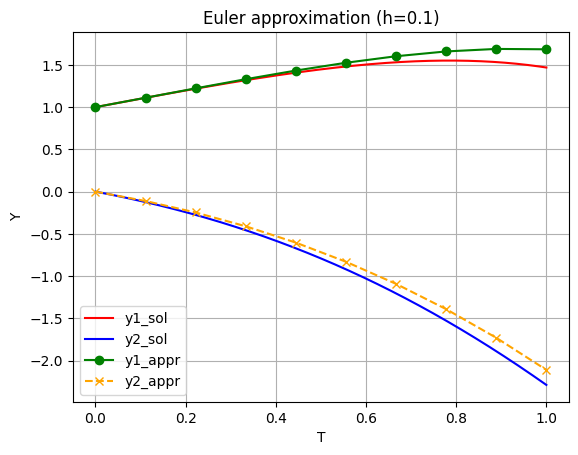

In [ ]:
def ode1(x):
  y = np.exp(x)*np.cos(x)
  return y

def ode2(x):
  y = -np.exp(x)*np.sin(x)
  return y

y1 = ode1(sol_pts)
y2 = ode2(sol_pts)
# Now lets plot them
fig, ax = plt.subplots()

ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h0, appr_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h0, appr_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.1)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

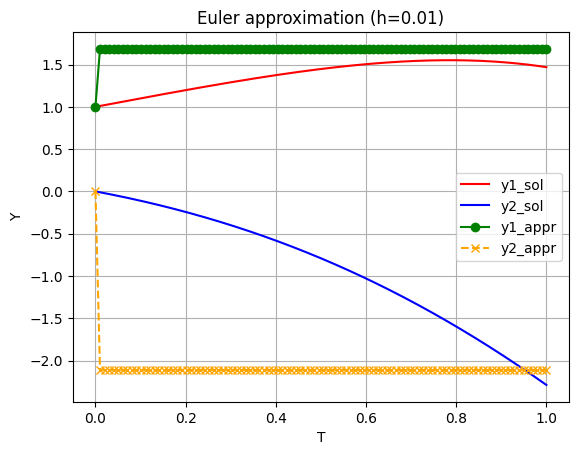

In [ ]:
fig, ax = plt.subplots()
ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h1, appr1_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h1, appr2_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.01)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

The error of the global truncation error at t=1 does not improve as h is decreased from 0.1 to 0.01.

In [ ]:
 # 6.3.Q1.B

t = symbols('t')
y1, y2 = symbols('y1 y2', cls=Function)

# Define the system of first-order ODEs
ode1 = Eq(y1(t).diff(t), -y1(t) - y2(t))
ode2 = Eq(y2(t).diff(t), y1(t) - y2(t))

# Define initial conditions
initial_conditions = {y1(0): 1, y2(0): 0}

# Find particular solutions using initial conditions
particular_solution = dsolve([ode1, ode2], ics=initial_conditions)

print("Particular solution for y1(t):", particular_solution[0].rhs)
print("Particular solution for y2(t):", particular_solution[1].rhs)

Particular solution for y1(t): exp(-t)*cos(t)
Particular solution for y2(t): exp(-t)*sin(t)


In [ ]:
#IVP
w0, d0 = 1,0

#Eulers with step = 0.1
appr_ode1 = [1]
appr_ode2 = [0]

for i in range(len(h0)-1):
  diff_1 = w0+0.11111111*(-w0-d0)
  appr_ode1.append(diff_1)

  diff_2 = d0+0.11111111*(w0-d0)
  appr_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr_ode1))
print(len(appr_ode2))

#Eulers with step=0.01
appr1_ode1 = [1]
appr2_ode2 = [0]

for i in range(len(h1)-1):
  diff1_1 = w0+0.01010101*(-w0-d0)
  appr1_ode1.append(diff_1)

  diff2_2 = d0+0.01010101*(w0-d0)
  appr2_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr1_ode1))
print(len(appr2_ode2))

10
10
100
100


In [ ]:
#Global truncation errors between solutions and Eulers(h=0.1)
err1 = abs(appr_ode1[-1] - np.exp(-1)*np.cos(1))
err2 = abs(appr_ode2[-1] - np.exp(-1)*np.sin(1))
combined_err = err1+err2

#Global truncation errors between solutions and Eulers(h=0.01)
err1_1 = abs(appr1_ode1[-1] - np.exp(-1)*np.cos(1))
err2_2 = abs(appr2_ode2[-1] - np.exp(-1)*np.sin(1))
combined_err1 = err1_1+err2_2

In [ ]:
print(combined_err)
print(combined_err1)

0.061325555026974815
0.061325555026974815


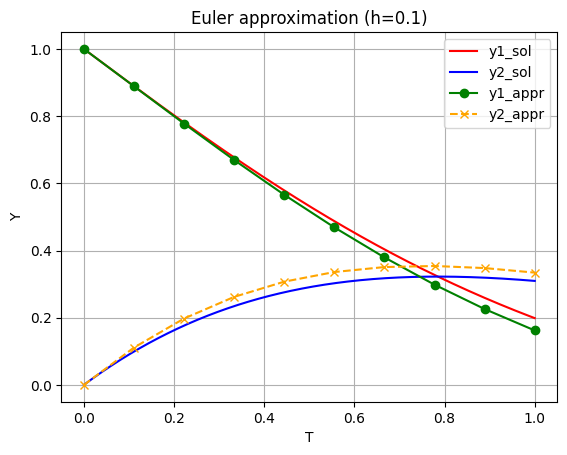

In [ ]:
def ode1(x):
  y = np.exp(-x)*np.cos(x)
  return y
def ode2(x):
  y = np.exp(-x)*np.sin(x)
  return y

y1 = ode1(sol_pts)
y2 = ode2(sol_pts)
# Now lets plot them
fig, ax = plt.subplots()

ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h0, appr_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h0, appr_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.1)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

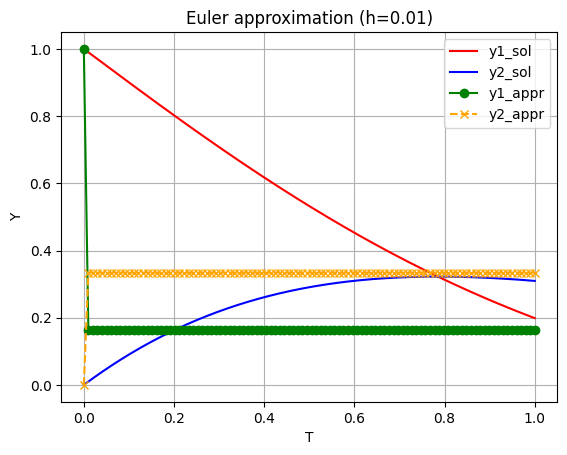

In [ ]:
fig, ax = plt.subplots()
ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h1, appr1_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h1, appr2_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.01)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [ ]:
 # 6.3.Q1.C

t = symbols('t')
y1, y2 = symbols('y1 y2', cls=Function)

# Define the system of first-order ODEs
ode1 = Eq(y1(t).diff(t), -y2(t))
ode2 = Eq(y2(t).diff(t), y1(t))

# Define initial conditions
initial_conditions = {y1(0): 1, y2(0): 0}

# Find particular solutions using initial conditions
particular_solution = dsolve([ode1, ode2], ics=initial_conditions)

print("Particular solution for y1(t):", particular_solution[0].rhs)
print("Particular solution for y2(t):", particular_solution[1].rhs)

Particular solution for y1(t): cos(t)
Particular solution for y2(t): sin(t)


In [ ]:
#IVP
w0, d0 = 1,0

#Eulers with step = 0.1
appr_ode1 = [1]
appr_ode2 = [0]

for i in range(len(h0)-1):
  diff_1 = w0+0.11111111*(-d0)
  appr_ode1.append(diff_1)

  diff_2 = d0+0.11111111*(w0)
  appr_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr_ode1))
print(len(appr_ode2))

#Eulers with step=0.01
appr1_ode1 = [1]
appr2_ode2 = [0]

for i in range(len(h1)-1):
  diff1_1 = w0+0.01010101*(-d0)
  appr1_ode1.append(diff_1)

  diff2_2 = d0+0.01010101*(w0)
  appr2_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr1_ode1))
print(len(appr2_ode2))

10
10
100
100


In [ ]:
#Global truncation errors between solutions and Eulers(h=0.1)
err1 = abs(appr_ode1[-1] - np.cos(1))
err2 = abs(appr_ode2[-1] - np.sin(1))
combined_err = err1+err2

#Global truncation errors between solutions and Eulers(h=0.01)
err1_1 = abs(appr1_ode1[-1] - np.cos(1))
err2_2 = abs(appr2_ode2[-1] - np.sin(1))
combined_err1 = err1_1+err2_2

In [ ]:
print(combined_err)
print(combined_err1)

0.07972876368148252
0.07972876368148252


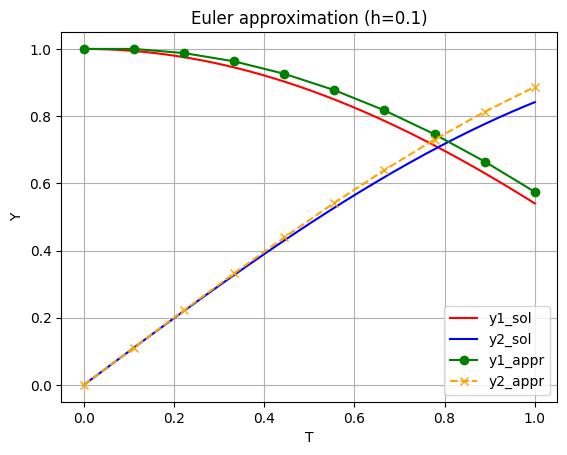

In [ ]:
def ode1(x):
  y = np.cos(x)
  return y
def ode2(x):
  y = np.sin(x)
  return y

y1 = ode1(sol_pts)
y2 = ode2(sol_pts)
# Now lets plot them
fig, ax = plt.subplots()

ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h0, appr_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h0, appr_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.1)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

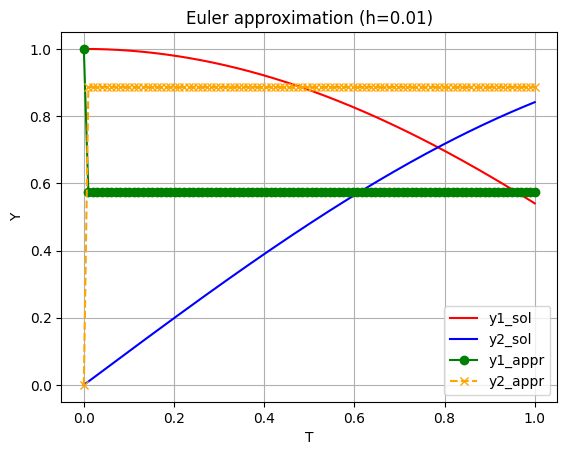

In [ ]:
fig, ax = plt.subplots()
ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h1, appr1_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h1, appr2_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.01)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)


In [ ]:
 # 6.3.Q1.D

t = symbols('t')
y1, y2 = symbols('y1 y2', cls=Function)

# Define the system of first-order ODEs
ode1 = Eq(y1(t).diff(t), y1(t)+3*y2(t))
ode2 = Eq(y2(t).diff(t), 2*y1(t)+2*y2(t))

# Define initial conditions
initial_conditions = {y1(0): 5, y2(0): 0}

# Find particular solutions using initial conditions
particular_solution = dsolve([ode1, ode2], ics=initial_conditions)

print("Particular solution for y1(t):", particular_solution[0].rhs)
print("Particular solution for y2(t):", particular_solution[1].rhs)

Particular solution for y1(t): 2*exp(4*t) + 3*exp(-t)
Particular solution for y2(t): 2*exp(4*t) - 2*exp(-t)


In [ ]:
#IVP
w0, d0 = 1,0

#Eulers with step = 0.1
appr_ode1 = [1]
appr_ode2 = [0]

for i in range(len(h0)-1):
  diff_1 = w0+0.11111111*(w0+3*d0)
  appr_ode1.append(diff_1)

  diff_2 = d0+0.11111111*(2*w0+2*d0)
  appr_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr_ode1))
print(len(appr_ode2))

#Eulers with step=0.01
appr1_ode1 = [1]
appr2_ode2 = [0]

for i in range(len(h1)-1):
  diff1_1 = w0+0.01010101*(w0+3*d0)
  appr1_ode1.append(diff_1)

  diff2_2 = d0+0.01010101*(2*w0+2*d0)
  appr2_ode2.append(diff_2)

  w0,d0 = diff_1, diff_2

print(len(appr1_ode1))
print(len(appr2_ode2))

10
10
100
100


In [ ]:
#Global truncation errors between solutions and Eulers(h=0.1)
err1 = abs(appr_ode1[-1] - 2*np.exp(4)-3*np.exp(-1))
err2 = abs(appr_ode2[-1] - 2*np.exp(4)+2*np.exp(-1))
combined_err = err1+err2

#Global truncation errors between solutions and Eulers(h=0.01)
err1_1 = abs(appr1_ode1[-1] - 2*np.exp(4)-3*np.exp(-1))
err2_2 = abs(appr2_ode2[-1] - 2*np.exp(4)+2*np.exp(-1))
combined_err1 = err1_1+err2_2

In [ ]:
print(combined_err)
print(combined_err1)

196.79353912788173
196.79353912788173


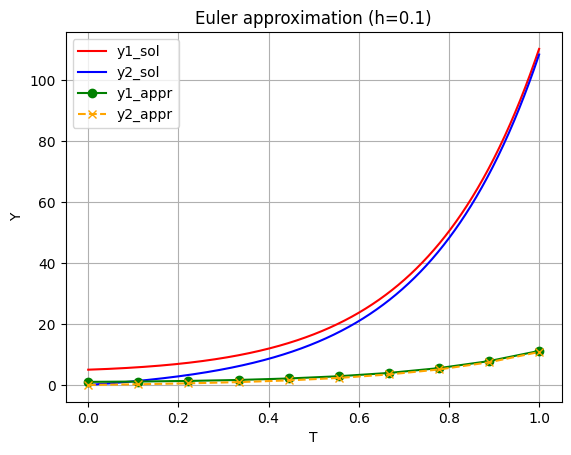

In [ ]:
def ode1(x):
  y = 2*np.exp(4*x) + 3*np.exp(-x)
  return y
def ode2(x):
  y =  2*np.exp(4*x) - 2*np.exp(-x)
  return y

y1 = ode1(sol_pts)
y2 = ode2(sol_pts)
# Now lets plot them
fig, ax = plt.subplots()

ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h0, appr_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h0, appr_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.1)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

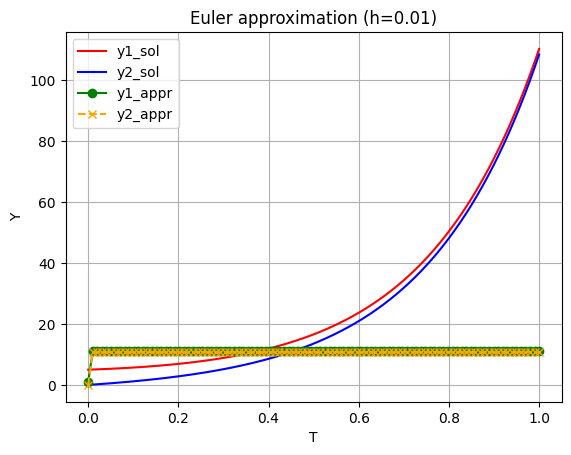

In [ ]:
fig, ax = plt.subplots()
ax.plot(sol_pts, y1, color='r', label='y1_sol')
ax.plot(sol_pts, y2, color = 'b', label = 'y2_sol')
ax.plot(h1, appr1_ode1, color = 'g', label = 'y1_appr', marker= 'o', linestyle='-')
ax.plot(h1, appr2_ode2, color= 'orange', label = 'y2_appr', marker = 'x', linestyle='--')


plt.title('Euler approximation (h=0.01)')
plt.xlabel('T')
plt.ylabel('Y')
plt.legend()
plt.grid(True)


For all examples as the step size decreases 10 fold from h=0.1 to h=0.01 the approximation of the solutions does not improve. In fact from the pictures it gets worse, much less accurate. The global truncation error stays the same for both step sizes. So the reduction in error for h=0.01 is not consistent with the order of Eulers Method for any of the 4 examples.

6.4.Q1

In [ ]:
# A

t = symbols('t')
y1 = symbols('y1', cls=Function)

# Define the system of first-order ODEs
ode1 = Eq(y1(t).diff(t), t)

# Define initial conditions
initial_conditions = {y1(0): 1}

# Find particular solutions using initial conditions
particular_solution = dsolve([ode1], ics=initial_conditions)

print("Particular solution for y1(t):", particular_solution[0].rhs)

Particular solution for y1(t): t**2/2 + 1


In [ ]:
def ode(t):
  y = (t**2)/2+1
  return y
h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1
i = 0
while i<len(h0):
  diff = w0+l*(h0[i]+l/2)
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain       sol    Eulers  Global Error
0  0.000000  1.000000  1.000000      0.000000
1  0.111111  1.006173  1.005000      0.001173
2  0.222222  1.024691  1.021111      0.003580
3  0.333333  1.055556  1.048333      0.007222
4  0.444444  1.098765  1.086667      0.012099
5  0.555556  1.154321  1.136111      0.018210
6  0.666667  1.222222  1.196667      0.025556
7  0.777778  1.302469  1.268333      0.034136
8  0.888889  1.395062  1.351111      0.043951
9  1.000000  1.500000  1.445000      0.055000


In [ ]:
#B
def ode(t):
  y = np.exp((t**3)/3)
  return y
h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1
i = 0
while i<len(h0):
  diff = w0+l*((h0[i]+l/2)**2)*(w0+l/2*((h0[i]**2)*w0))
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain       sol    Eulers  Global Error
0  0.000000  1.000000  1.000000      0.000000
1  0.111111  1.000457  1.000250      0.000207
2  0.222222  1.003665  1.002848      0.000817
3  0.333333  1.012422  1.010298      0.002124
4  0.444444  1.029696  1.025226      0.004470
5  0.555556  1.058821  1.050538      0.008283
6  0.666667  1.103807  1.089655      0.014152
7  0.777778  1.169804  1.146865      0.022939
8  0.888889  1.263784  1.227827      0.035957
9  1.000000  1.395612  1.340337      0.055275


In [ ]:
#C
def ode(t):
  y = np.exp(t**2)*np.exp(2*t)
  return y

h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1

i = 0
while i<len(h0):
  diff = w0+l*(2*(h0[i]+(l/2)+1)*(w0+(l/2)*(2*(h0[i]+1)*w0)))
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain        sol     Eulers  Global Error
0  0.000000   1.000000   1.000000      0.000000
1  0.111111   1.264362   1.231000      0.033362
2  0.222222   1.638575   1.548628      0.089947
3  0.333333   2.176630   1.990829      0.185801
4  0.444444   2.963644   2.615064      0.348580
5  0.555556   4.136099   3.509577      0.626522
6  0.666667   5.916694   4.811847      1.104846
7  0.777778   8.675421   6.739260      1.936161
8  0.888889  13.038431   9.640802      3.397629
9  1.000000  20.085537  14.085450      6.000087


In [ ]:
#C
def ode(t):
  y = np.exp(t**2)*np.exp(2*t)
  return y

h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1

i = 0
while i<len(h0):
  diff = w0+l*(2*(h0[i]+(l/2)+1)*(w0+(l/2)*(2*(h0[i]+1)*w0)))
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain        sol     Eulers  Global Error
0  0.000000   1.000000   1.000000      0.000000
1  0.111111   1.264362   1.231000      0.033362
2  0.222222   1.638575   1.548628      0.089947
3  0.333333   2.176630   1.990829      0.185801
4  0.444444   2.963644   2.615064      0.348580
5  0.555556   4.136099   3.509577      0.626522
6  0.666667   5.916694   4.811847      1.104846
7  0.777778   8.675421   6.739260      1.936161
8  0.888889  13.038431   9.640802      3.397629
9  1.000000  20.085537  14.085450      6.000087


In [ ]:
#D
def ode(t):
  y = np.exp(t**5)
  return y

h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1

i = 0
while i<len(h0):
  diff = w0+l*((5*(h0[i]+l/2)**4)*(w0+l/2*(5*l/2*(5*h0[i]*w0))))
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain       sol    Eulers  Global Error
0  0.000000  1.000000  1.000000      0.000000
1  0.111111  1.000017  1.000003      0.000014
2  0.222222  1.000542  1.000342      0.000200
3  0.333333  1.004124  1.003127      0.000997
4  0.444444  1.017493  1.014183      0.003310
5  0.555556  1.054348  1.045333      0.009015
6  0.666667  1.140751  1.118054      0.022697
7  0.777778  1.329267  1.271668      0.057599
8  0.888889  1.741817  1.584718      0.157099
9  1.000000  2.718282  2.234638      0.483644


In [ ]:
#E
def ode(t):
  y = (3*t+1)**(1/3)
  return y

h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1

i = 0
while i<len(h0):
  diff = w0+l*(1/((w0+(l/2)*(1/w0**2))**2))
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain       sol    Eulers  Global Error
0  0.000000  1.000000  1.000000      0.000000
1  0.111111  1.100642  1.090703      0.009939
2  0.222222  1.185631  1.168640      0.016991
3  0.333333  1.259921  1.237481      0.022440
4  0.444444  1.326352  1.299468      0.026884
5  0.555556  1.386723  1.356079      0.030644
6  0.666667  1.442250  1.408341      0.033909
7  0.777778  1.493802  1.457001      0.036800
8  0.888889  1.542022  1.502621      0.039401
9  1.000000  1.587401  1.545633      0.041768


In [ ]:
#F
def ode(t):
  y = (((3/4)*(t**4)+1))**(1/3)
  return y

h0 = np.linspace(0,1, 10)
l=0.1
range = ode(h0)
appr = [1]
w0 = 1

i = 0
while i<len(h0):
  diff = w0+l*(((h0[i]+l/2)**3)/(w0+(l/2)*(h0[i]**3/w0**2))**2)
  appr.append(diff)
  w0 = diff
  i+=1

sol = np.array(ode(h0))
appr = np.array(appr[:-1])
err = sol-appr

dataset = {'domain':h0, 'sol':range, 'Eulers':appr, 'Global Error': err}
df = pd.DataFrame(dataset)
print(df)

     domain       sol    Eulers  Global Error
0  0.000000  1.000000  1.000000      0.000000
1  0.111111  1.000038  1.000012      0.000026
2  0.222222  1.000609  1.000431      0.000179
3  0.333333  1.003077  1.002444      0.000633
4  0.444444  1.009661  1.008029      0.001632
5  0.555556  1.023269  1.019824      0.003446
6  0.666667  1.047127  1.040833      0.006294
7  0.777778  1.084199  1.073935      0.010264
8  0.888889  1.136573  1.121299      0.015274
9  1.000000  1.205071  1.183964      0.021107


Write a MATLAB (or Python) implementation of RK23 (Example 6.19), and apply to approximating
the solutions of the IVPs in Exercise 6.1.3 with a relative tolerance of 10−8 on [0,1]. Ask
the program to stop exactly at the endpoint t = 1. Report the maximum step size used
and the number of steps.

In [2]:

def rk23(func, ivp, step, lb = 0, ub = 1, tol = 10**(-8)):
  w0 = ivp
  counter = 0
  maxstep = 0
  while lb<ub:

    counter+=1

    if lb+step>ub:
      step = ub-lb

    if step > maxstep:
      maxstep = step

    s1 = func(lb,w0)
    s2 = func(lb+step, w0+step*s1)
    s3 = func(lb+1/2*step, w0+1/2*step*((s1+s2)/2))

    wi = w0+step*((s1+s2)/2)
    zi = w0+step*((s1+s2+4*s3)/6)

    ei = np.abs(wi-zi)

    if ei/np.abs(wi)>=tol:
      step= step*0.5

    elif 10*ei/np.abs(wi)<tol:
      lb+=step
      step = step*2
      w0 = wi
    else:
      lb+=step
      w0=wi

  return maxstep, counter #function returns (greatest step size, number of steps it takes to cover the interval)

#the initial step size is 0.01
#the initial tolerance is 10^(-8)
#the interval is always [0,1]

In [9]:
def func1(t,w):
  y = t
  return y
print(rk23(func1, 1, 0.01))

(0.3699999999999999, 7)


In [4]:
def func2(t,w):
  y = w*t**2
  return y
print(rk23(func2,1,0.01))

(0.01, 387)


In [5]:
def func3(t,w):
  y = 2*(t+1)*w
  return y
print(rk23(func3,1,0.01))

(0.01, 1151)


In [6]:
def func4(t,w):
  y = 5*w*t**4
  return y
print(rk23(func4,1,0.01))

(0.02, 677)


In [7]:
def func5(t,w):
  y = 1/w**2
  return y
print(rk23(func5,1,0.01))

(0.01, 187)


In [8]:
def func6(t,w):
  y = t**3/w**2
  return y
print(rk23(func6,1,0.01))

(0.01, 369)
